In [1]:
import pandas as pd
import numpy as np
import warnings
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Suppress warnings
warnings.filterwarnings("ignore")

In [2]:
# Read the data file
names = ['id','age', 'gender', 'education', 'country',
'ethnicity', 'neuroticism', 'extraversion', 'openness_to_experience',
'agreeableness','conscientiousness', 'impulsiveness', 'sensation', 'alcohol', 'amphet',
'amyl', 'benzos', 'caff', 'cannabis', 'choc', 'coke', 'crack', 'ecstasy',
'heroin', 'ketamine', 'legalh', 'lsd', 'meth', 'mushrooms',
'nicotine', 'semer', 'vsa']
df = pd.read_csv('drug_consumption.data', names=names)

In [3]:
df.head()

,id,age,gender,education,country,ethnicity,neuroticism,extraversion,openness_to_experience,agreeableness,...,ecstasy,heroin,ketamine,legalh,lsd,meth,mushrooms,nicotine,semer,vsa
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


In [4]:
# Filter the columns
df_filtered = df[['id','age', 'gender', 'education',
          'neuroticism', 'extraversion', 
          'openness_to_experience', 'agreeableness',
          'conscientiousness', 'impulsiveness', 'sensation',
          'cannabis']]

In [5]:
df_filtered.head()

,id,age,gender,education,neuroticism,extraversion,openness_to_experience,agreeableness,conscientiousness,impulsiveness,sensation,cannabis
0,1,0.49788,0.48246,-0.05921,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,CL0
1,2,-0.07854,-0.48246,1.98437,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,CL4
2,3,0.49788,-0.48246,-0.05921,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,CL3
3,4,-0.95197,0.48246,1.16365,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,CL2
4,5,0.49788,0.48246,1.98437,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,CL3


In [6]:
# # Replace Cannabis list with original classification
# df_filtered.replace({
#     'CL0' : 'Never Used', 
#     'CL1' : 'Used over a Decade Ago',
#     'CL2' : 'Used in Last Decade',
#     'CL3' : 'Used in Last Year',
#     'CL4' : 'Used in Last Month',
#     'CL5' : 'Used in Last Week',
#     'CL6' : 'Used in Last Day'})

In [7]:
# Replace and combine the cannabis result into 0 = never used and 1 = used -past or present-
df_cannabis = df_filtered.replace({
    'CL0' : 0, 
    'CL1' : 1,
    'CL2' : 1,
    'CL3' : 1,
    'CL4' : 1,
    'CL5' : 1,
    'CL6' : 1})

df_cannabis.head()

,id,age,gender,education,neuroticism,extraversion,openness_to_experience,agreeableness,conscientiousness,impulsiveness,sensation,cannabis
0,1,0.49788,0.48246,-0.05921,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,0
1,2,-0.07854,-0.48246,1.98437,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,1
2,3,0.49788,-0.48246,-0.05921,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,1
3,4,-0.95197,0.48246,1.16365,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,1
4,5,0.49788,0.48246,1.98437,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,1


In [8]:
# Check for nulls
df_cannabis.isnull().sum().head()

id             0
age            0
gender         0
education      0
neuroticism    0
dtype: int64

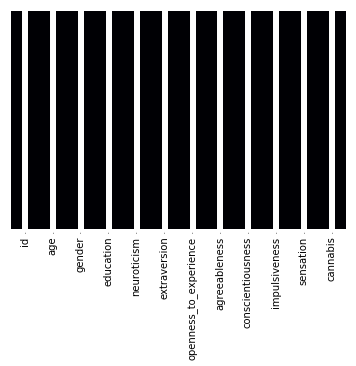

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# NULL Heatmap for Train data
sns.heatmap(df_cannabis.isnull(),yticklabels=False, cbar=False,cmap='inferno',annot=True)

In [9]:
list(df_cannabis)
df.shape

(1885, 32)

In [10]:
from sklearn.model_selection import train_test_split

target = df_cannabis["cannabis"]

data = df_cannabis.drop(columns=["cannabis","id"])
feature_names = data.columns

In [11]:
data.head()

,age,gender,education,neuroticism,extraversion,openness_to_experience,agreeableness,conscientiousness,impulsiveness,sensation
0,0.49788,0.48246,-0.05921,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084
1,-0.07854,-0.48246,1.98437,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575
2,0.49788,-0.48246,-0.05921,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148
3,-0.95197,0.48246,1.16365,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084
4,0.49788,0.48246,1.98437,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575


In [12]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=1, stratify=target)

In [13]:
X_train.head()

,age,gender,education,neuroticism,extraversion,openness_to_experience,agreeableness,conscientiousness,impulsiveness,sensation
785,-0.95197,-0.48246,-0.05921,-1.69163,1.28610,-0.58331,-0.60633,-1.13788,1.86203,0.76540
1341,-0.95197,-0.48246,-1.22751,1.37297,-1.23177,-1.11902,-2.53830,0.93949,-1.37983,-0.21575
53,1.09449,-0.48246,1.16365,-1.43907,-0.15487,1.06238,0.28783,0.25953,-0.21712,-0.21575
974,-0.95197,-0.48246,-0.61113,-0.58016,1.11406,0.72330,0.59042,-0.00665,-0.21712,-0.52593
1209,-0.95197,-0.48246,-0.61113,-0.24649,-1.09207,0.29338,-0.45321,-1.01450,-1.37983,0.76540


In [20]:
# Summary of train data
X_train.describe()

,age,gender,education,neuroticism,extraversion,openness_to_experience,agreeableness,conscientiousness,impulsiveness,sensation
count,1413.000000,1413.000000,1413.000000,1413.000000,1413.000000,1413.000000,1413.000000,1413.000000,1413.000000,1413.000000
mean,0.022364,0.000341,0.000813,-0.030896,0.012155,-0.016387,0.005969,0.004482,-0.001504,-0.017735
std,0.884530,0.482631,0.945494,0.982636,0.978662,0.996493,0.983210,0.984195,0.954281,0.956490
min,-0.951970,-0.482460,-2.435910,-3.464360,-3.273930,-3.273930,-3.464360,-2.901610,-2.555240,-2.078480
25%,-0.951970,-0.482460,-0.611130,-0.678250,-0.575450,-0.717270,-0.606330,-0.652530,-0.711260,-0.525930
50%,-0.078540,0.482460,-0.059210,-0.051880,0.003320,-0.019280,-0.017290,-0.006650,-0.217120,0.079870
75%,0.497880,0.482460,0.454680,0.629670,0.637790,0.723300,0.760960,0.584890,0.529750,0.765400
max,2.591710,0.482460,1.984370,3.273930,3.005370,2.901610,2.756960,3.464360,2.901610,1.921730


In [22]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1413 entries, 785 to 1133
Data columns (total 10 columns):
age                       1413 non-null float64
gender                    1413 non-null float64
education                 1413 non-null float64
neuroticism               1413 non-null float64
extraversion              1413 non-null float64
openness_to_experience    1413 non-null float64
agreeableness             1413 non-null float64
conscientiousness         1413 non-null float64
impulsiveness             1413 non-null float64
sensation                 1413 non-null float64
dtypes: float64(10)
memory usage: 121.4 KB



## Data Visualization for understanding the Data


In [73]:
# 1) Observing drug consumption rate over Age

age=pd.concat([df_cannabis[df_cannabis.cannabis==1]['age'],df_cannabis[df_cannabis.cannabis==0]['age']],axis=1)
age.columns=['Drug User','Never Used']
age.head()

,Drug User,Never Used
0,NaN,0.49788
1,-0.07854,NaN
2,0.49788,NaN
3,-0.95197,NaN
4,0.49788,NaN


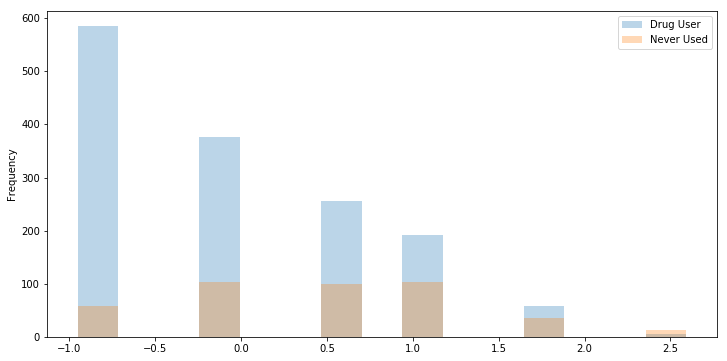

In [74]:
age.plot(kind='hist',bins=15,figsize=(12,6),alpha=0.3)

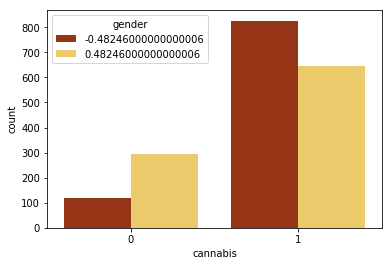

In [29]:
# 2) Validating drug consumption rate across Gender

sns.countplot(x='cannabis',hue='gender',data=df_cannabis,palette='afmhot')

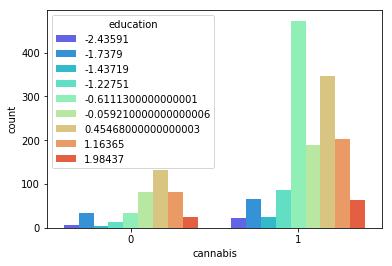

In [44]:
# 3) Analyzing drug consumption rate across Education Level

sns.countplot(x='cannabis',hue='education',data=df_cannabis,palette='rainbow')

In [93]:
# Bringing all the basic personal information features above (Age, Gender, Education) together and create a pivot table

ASE=df_cannabis[df_cannabis.cannabis.notnull()].pivot_table(index=['age','gender','education'],values=['cannabis']).sort_values('cannabis',ascending=False)
ASE

cannabis
age      gender   education          
-0.95197 -0.48246 -2.43591   1.000000
-0.07854 -0.48246 -1.22751   1.000000
          0.48246 -2.43591   1.000000
                  -1.43719   1.000000
                  -1.22751   1.000000
 0.49788 -0.48246 -2.43591   1.000000
                  -1.43719   1.000000
                  -1.22751   1.000000
          0.48246 -2.43591   1.000000
-0.95197 -0.48246 -1.73790   1.000000
 1.09449 -0.48246 -2.43591   1.000000
                  -1.43719   1.000000
          0.48246 -1.22751   1.000000
 1.82213 -0.48246 -1.43719   1.000000
          0.48246 -1.73790   1.000000
                  -1.43719   1.000000
                   1.98437   1.000000
 2.59171 -0.48246  1.16365   1.000000
          0.48246 -0.05921   1.000000
-0.07854 -0.48246 -0.05921   1.000000
 2.59171  0.48246  1.98437   1.000000
-0.95197 -0.48246  1.16365   1.000000
                  -1.43719   1.000000
                  -1.22751   1.000000
-0.07854 -0.48246 -1.43719   1.000000
                  -2.43591   1.000000
-0.95197 -0.48246  1.98437   1.000000
          0.48246 -2.43591   1.000000
         -0.48246 -0.61113   0.987179
                  -0.05921   0.970588
...                               ...
 1.09449  0.48246  1.98437   0.600000
-0.95197  0.48246 -1.73790   0.600000
 1.82213  0.48246 -0.61113   0.600000
 1.09449  0.48246  0.45468   0.577778
 0.49788 -0.48246  1.98437   0.571429
          0.48246 -0.05921   0.568182
 1.09449 -0.48246 -0.05921   0.555556
-0.95197  0.48246  1.16365   0.555556
 1.82213  0.48246  1.16365   0.500000
-0.07854  0.48246 -1.73790   0.500000
 2.59171 -0.48246 -0.61113   0.500000
 1.82213  0.48246 -1.22751   0.500000
         -0.48246 -2.43591   0.500000
                   1.98437   0.500000
 1.09449  0.48246 -1.73790   0.466667
 1.82213  0.48246 -0.05921   0.416667
 0.49788  0.48246 -1.73790   0.416667
                  -1.22751   0.400000
 1.09449  0.48246 -0.05921   0.394737
 2.59171 -0.48246 -2.43591   0.333333
 0.49788  0.48246 -1.43719   0.333333
 1.82213  0.48246 -2.43591   0.000000
 2.59171  0.48246 -1.73790   0.000000
                   1.16365   0.000000
                  -1.22751   0.000000
         -0.48246 -0.05921   0.000000
                   1.98437   0.000000
                   0.45468   0.000000
 1.09449  0.48246 -1.43719   0.000000
 1.82213 -0.48246 -1.22751   0.000000

[100 rows x 1 columns]

Text(80, 0.51, '50% potential smoker')

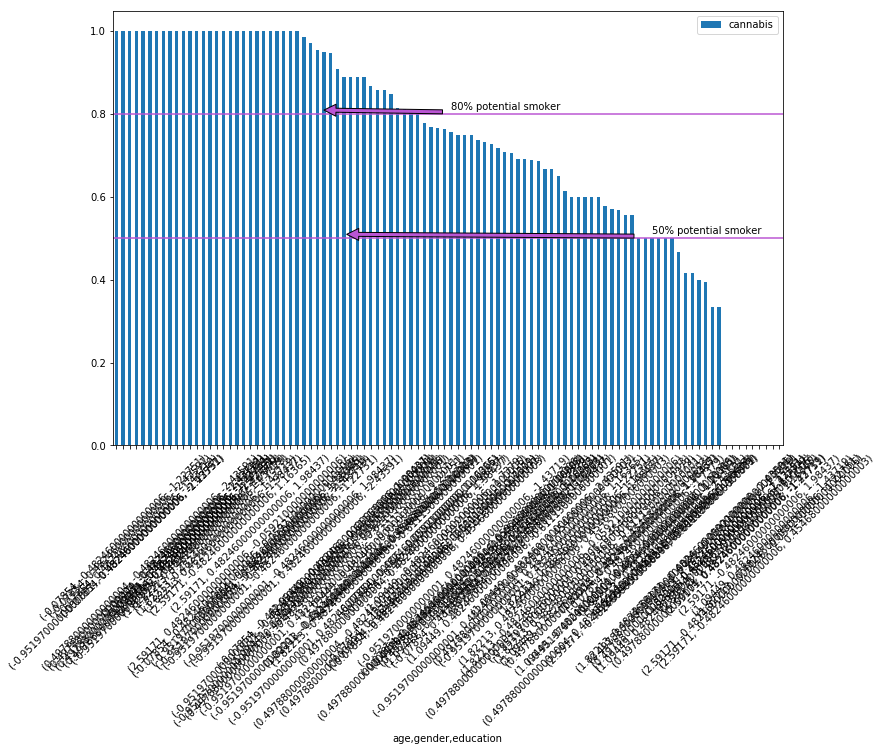

In [94]:
# From the pivot tables above, there is definitely a relationship among 'Age','Gender','Education'and 'Drug Consumer'
# So we can combine them together ==> Combined feature 'A.S.E'; and visualize it:

ASE.plot(kind='bar',figsize=(12,8))
plt.xticks(rotation=45)
plt.axhline(0.8,color='#BA55D3')
plt.axhline(0.5,color='#BA55D3')
plt.annotate('80% potential smoker',xy=(30,0.81),xytext=(50,0.81),arrowprops=dict(facecolor='#BA55D3',shrink=0.05))
plt.annotate('50% potential smoker',xy=(32,0.51),xytext=(80,0.51),arrowprops=dict(facecolor='#BA55D3',shrink=0.05))




## Basic Modeling & Evaluation
### We choose 5 models and use 5-folds cross-calidation to evaluate these models.

    · Logistic Regression
    · k-Nearest Neighbors
    · Random Forrest
    · Gradient Boosting Decision Tree
    · Support Vector Machine


In [111]:
# Define all the predictors
predictors=['age', 'gender', 'education',
          'neuroticism', 'extraversion', 
          'openness_to_experience', 'agreeableness',
          'conscientiousness', 'impulsiveness', 'sensation']

In [122]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

In [123]:
# Scale the data using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
X_scaler = MinMaxScaler().fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [124]:
models=[LogisticRegression(),KNeighborsClassifier(),RandomForestClassifier(),GradientBoostingClassifier(),SVC()]

In [125]:
# evaluate models by using cross-validation
names=['LR','KNN','RF','GDBT','SVM']
for name, model in zip(names,models):
    score=cross_val_score(model,X_train,y_train,cv=5)
    print("{}:{},{}".format(name,score.mean(),score))

LR:0.7912387539783976,[0.77738516 0.77385159 0.80212014 0.80141844 0.80141844]
KNN:0.7791995589304062,[0.76325088 0.78798587 0.77738516 0.79078014 0.77659574]
RF:0.7671804125003133,[0.77031802 0.72084806 0.7844523  0.79787234 0.76241135]
GDBT:0.777086935819362,[0.77031802 0.75971731 0.77738516 0.78723404 0.79078014]
SVM:0.8018544971556023,[0.80918728 0.78091873 0.795053   0.81560284 0.80851064]


In [128]:
## 1) We notice that Support Vector Machine and Logistic Regression might perform better on scaled data;

## 2) Then we will use GradientBoostingClassifier to see which features are important

model=GradientBoostingClassifier()
model.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [129]:
model.feature_importances_

array([0.08613484, 0.03061461, 0.07559287, 0.05290929, 0.09865953,
       0.19395601, 0.08048554, 0.12929585, 0.01819414, 0.23415731])

In [131]:
FI=pd.DataFrame({'importance':model.feature_importances_},index=X_train.columns)
FI.sort_values('importance',ascending=False)

,importance
sensation,0.234157
openness_to_experience,0.193956
conscientiousness,0.129296
extraversion,0.098660
age,0.086135
agreeableness,0.080486
education,0.075593
neuroticism,0.052909
gender,0.030615
impulsiveness,0.018194


Text(0.5, 1.0, 'Feature Importance')

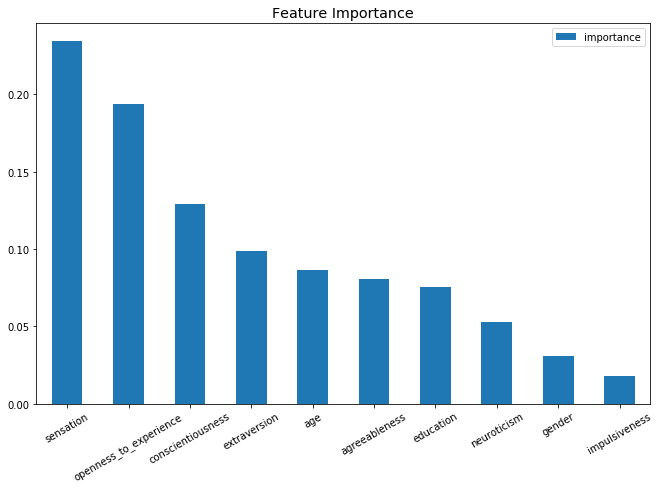

In [132]:
FI.sort_values('importance',ascending=False).plot.bar(figsize=(11,7))
plt.xticks(rotation=30)
plt.title('Feature Importance',size='x-large')

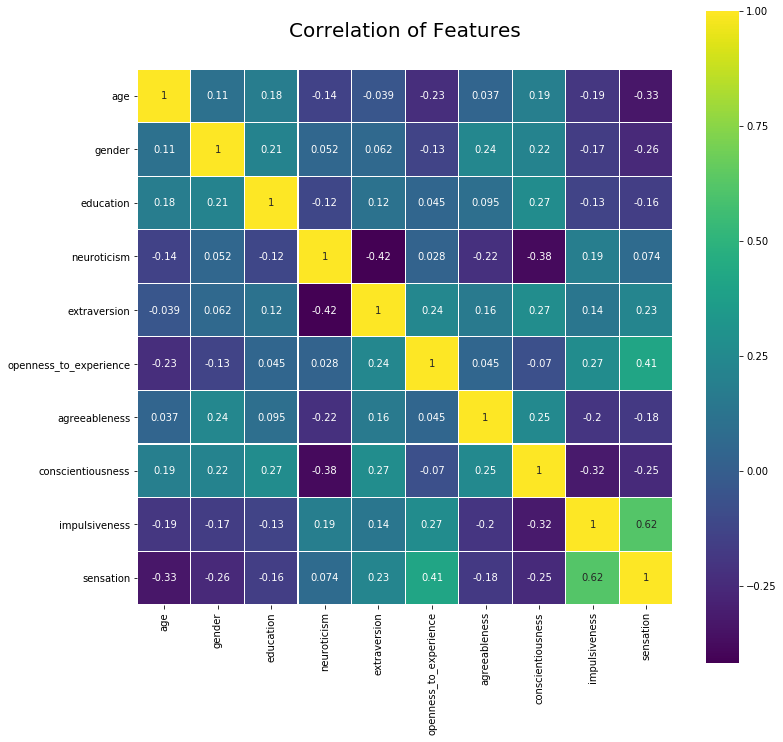

In [141]:
# Draw a Correlation cheatmap for all the features
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Correlation of Features', y=1.05, size=20)
sns.heatmap(X_train[['age', 'gender', 'education',
          'neuroticism', 'extraversion', 
          'openness_to_experience', 'agreeableness',
          'conscientiousness', 'impulsiveness', 'sensation']].astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

##### k-Nearest Neighbors

In [155]:
from sklearn.model_selection import GridSearchCV

param_grid={'n_neighbors':[1,2,3,4,5,6,7,8,9,10]}
grid_search=GridSearchCV(KNeighborsClassifier(),param_grid,cv=5)

grid_search.fit(X_train,y_train)

grid_search.best_params_,grid_search.best_score_

({'n_neighbors': 10}, 0.7933474876150035)

In [172]:
# test scores
grid_search.fit(X_test,y_test)
grid_search.best_params_,grid_search.best_score_

C:\Users\CY\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


({'n_neighbors': 9}, 0.8347457627118644)

###### Support Vector Machine

In [156]:
# Create SVC model
from sklearn.svm import SVC
SVCmodel = SVC(kernel='linear')
SVCmodel.fit(X_train_scaled, y_train)

print(f"Training Data Score: {SVCmodel.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {SVCmodel.score(X_test_scaled, y_test)}")

Training Data Score: 0.7806086341118188
Testing Data Score: 0.7817796610169492


In [157]:
# Create the GridSearchCV model for SVC model
from sklearn.model_selection import GridSearchCV
svc_param_grid = {'C': [1, 5, 10],
              'gamma': [0.0001, 0.001, 0.01],
              'kernel': ['linear']}
svc_grid = GridSearchCV(SVCmodel, svc_param_grid, verbose=3)

In [158]:
# Fit the model using the grid search estimator
svc_grid.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] C=1, gamma=0.0001, kernel=linear ................................
[CV] .... C=1, gamma=0.0001, kernel=linear, score=0.780, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=linear ................................
[CV] .... C=1, gamma=0.0001, kernel=linear, score=0.781, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=linear ................................
[CV] .... C=1, gamma=0.0001, kernel=linear, score=0.781, total=   0.0s
[CV] C=1, gamma=0.001, kernel=linear .................................
[CV] ..... C=1, gamma=0.001, kernel=linear, score=0.780, total=   0.0s
[CV] C=1, gamma=0.001, kernel=linear .................................
[CV] ..... C=1, gamma=0.001, kernel=linear, score=0.781, total=   0.0s
[CV] C=1, gamma=0.001, kernel=linear .................................
[CV] ..... C=1, gamma=0.001, kernel=linear, score=0.781, total=   0.0s
[CV] C=1, gamma=0.01, kernel=linear ..................................
[CV] ...... C=1, 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] .... C=5, gamma=0.0001, kernel=linear, score=0.781, total=   0.0s
[CV] C=5, gamma=0.0001, kernel=linear ................................
[CV] .... C=5, gamma=0.0001, kernel=linear, score=0.781, total=   0.0s
[CV] C=5, gamma=0.001, kernel=linear .................................
[CV] ..... C=5, gamma=0.001, kernel=linear, score=0.786, total=   0.0s
[CV] C=5, gamma=0.001, kernel=linear .................................
[CV] ..... C=5, gamma=0.001, kernel=linear, score=0.781, total=   0.0s
[CV] C=5, gamma=0.001, kernel=linear .................................
[CV] ..... C=5, gamma=0.001, kernel=linear, score=0.781, total=   0.0s
[CV] C=5, gamma=0.01, kernel=linear ..................................
[CV] ...... C=5, gamma=0.01, kernel=linear, score=0.786, total=   0.0s
[CV] C=5, gamma=0.01, kernel=linear ..................................
[CV] ...... C=5, gamma=0.01, kernel=linear, score=0.781, total=   0.0s
[CV] C=5, gamma=0.01, kernel=linear ..................................
[CV] .

[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:    0.4s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='linear',
                           max_iter=-1, probability=False, random_state=None,
                           shrinking=True, tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [1, 5, 10], 'gamma': [0.0001, 0.001, 0.01],
                         'kernel': ['linear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [159]:
# Print scores for SVC
print(svc_grid.best_params_)
print(svc_grid.best_score_)

{'C': 5, 'gamma': 0.0001, 'kernel': 'linear'}
0.7827317763623496


##### Logistic Regression model

In [160]:
# Logistic Regression model
from sklearn.linear_model import LogisticRegression
model_log = LogisticRegression()

# Train the model
model_log.fit(X_train_scaled, y_train)

# Print scores
print(f"Training Data Score: {model_log.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {model_log.score(X_test_scaled, y_test)}")

Training Data Score: 0.7983014861995754
Testing Data Score: 0.826271186440678


In [161]:
# Create the GridSearchCV model for logistic regression
from sklearn.model_selection import GridSearchCV

logistic_param_grid = {"penalty": ['l1', 'l2'],
              "C": np.logspace(0, 4, 10)}
logistic_grid = GridSearchCV(model_log, logistic_param_grid, cv=5, verbose=3)

In [162]:
# Fit the model using the grid search estimator
logistic_grid.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] C=1.0, penalty=l1 ...............................................
[CV] ................... C=1.0, penalty=l1, score=0.777, total=   0.0s
[CV] C=1.0, penalty=l1 ...............................................
[CV] ................... C=1.0, penalty=l1, score=0.774, total=   0.0s
[CV] C=1.0, penalty=l1 ...............................................
[CV] ................... C=1.0, penalty=l1, score=0.802, total=   0.0s
[CV] C=1.0, penalty=l1 ...............................................
[CV] ................... C=1.0, penalty=l1, score=0.805, total=   0.0s
[CV] C=1.0, penalty=l1 ...............................................
[CV] ................... C=1.0, penalty=l1, score=0.801, total=   0.0s
[CV] C=1.0, penalty=l2 ...............................................
[CV] ................... C=1.0, penalty=l2, score=0.777, total=   0.0s
[CV] C=1.0, penalty=l2 ...............................................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ..... C=7.742636826811269, penalty=l1, score=0.802, total=   0.0s
[CV] C=7.742636826811269, penalty=l1 .................................
[CV] ..... C=7.742636826811269, penalty=l1, score=0.801, total=   0.0s
[CV] C=7.742636826811269, penalty=l1 .................................
[CV] ..... C=7.742636826811269, penalty=l1, score=0.801, total=   0.0s
[CV] C=7.742636826811269, penalty=l2 .................................
[CV] ..... C=7.742636826811269, penalty=l2, score=0.777, total=   0.0s
[CV] C=7.742636826811269, penalty=l2 .................................
[CV] ..... C=7.742636826811269, penalty=l2, score=0.774, total=   0.0s
[CV] C=7.742636826811269, penalty=l2 .................................
[CV] ..... C=7.742636826811269, penalty=l2, score=0.802, total=   0.0s
[CV] C=7.742636826811269, penalty=l2 .................................
[CV] ..... C=7.742636826811269, penalty=l2, score=0.801, total=   0.0s
[CV] C=7.742636826811269, penalty=l2 .................................
[CV] .

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.6s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
   

In [163]:
# Print scores for Logistic Regression
print(logistic_grid.best_params_)
print(logistic_grid.best_score_)

{'C': 1.0, 'penalty': 'l1'}
0.7919320594479831


In [164]:
# Linear regression model
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()

# Train the model
linear_model.fit(X_train_scaled, y_train)

# Print scores
print(f"Training Data Score: {linear_model.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {linear_model.score(X_test_scaled, y_test)}")

Training Data Score: 0.21024063495528178
Testing Data Score: 0.26153064221041367


In [165]:
# Create the GridSearchCV model for Linear Regression
from sklearn.model_selection import GridSearchCV
param_grid = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
linear_grid = GridSearchCV(linear_model, param_grid, verbose=3)

In [166]:
# Fit the model using the grid search estimator
linear_grid.fit(X_train, y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] copy_X=True, fit_intercept=True, normalize=True .................
[CV]  copy_X=True, fit_intercept=True, normalize=True, score=0.159, total=   0.0s
[CV] copy_X=True, fit_intercept=True, normalize=True .................
[CV]  copy_X=True, fit_intercept=True, normalize=True, score=0.213, total=   0.0s
[CV] copy_X=True, fit_intercept=True, normalize=True .................
[CV]  copy_X=True, fit_intercept=True, normalize=True, score=0.224, total=   0.0s
[CV] copy_X=True, fit_intercept=True, normalize=False ................
[CV]  copy_X=True, fit_intercept=True, normalize=False, score=0.159, total=   0.0s
[CV] copy_X=True, fit_intercept=True, normalize=False ................
[CV]  copy_X=True, fit_intercept=True, normalize=False, score=0.213, total=   0.0s
[CV] copy_X=True, fit_intercept=True, normalize=False ................
[CV]  copy_X=True, fit_intercept=True, normalize=False, score=0.224, total=   0.0s
[CV] copy_X=True, f

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    0.1s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=LinearRegression(copy_X=True, fit_intercept=True,
                                        n_jobs=None, normalize=False),
             iid='warn', n_jobs=None,
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'normalize': [True, False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [167]:
# Print LinearRegression best params and best score
print(linear_grid.best_params_)
print(linear_grid.best_score_)

{'copy_X': True, 'fit_intercept': True, 'normalize': True}
0.19885774904465725


In [168]:
# Ridge model
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=.01).fit(X_train_scaled, y_train)

print(f"Training Data Score: {ridge.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {ridge.score(X_test_scaled, y_test)}")

Training Data Score: 0.21024062654868914
Testing Data Score: 0.2615335927964304


In [169]:
# Create the GridSearchCV model for Ridge
from sklearn.model_selection import GridSearchCV

param_grid_ridge = {'alpha': [0.001, 0.01, 0.1]}
ridge_grid = GridSearchCV(ridge, param_grid_ridge, n_jobs=1, cv=10)

In [170]:
# Fit the model using the grid search estimator
ridge_grid.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=Ridge(alpha=0.01, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=1, param_grid={'alpha': [0.001, 0.01, 0.1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
# Print scores for Ridge
print(ridge_grid.best_params_)
print(ridge_grid.best_score_)

In [ ]:
# ElasticNet model
from sklearn.linear_model import ElasticNet

# Create and train the model
elastic_model = ElasticNet(alpha=.01).fit(X_train_scaled, y_train)

# Print scores
print(f"Training Data Score: {elastic_model.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {elastic_model.score(X_test_scaled, y_test)}")

In [ ]:
# Create the GridSearchCV model for ElasticNet
from sklearn.model_selection import GridSearchCV
elastic_param_grid = {
                     "max_iter": [1, 5, 10],
                      "alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                      "l1_ratio": np.arange(0.0, 1.0, 0.1)
                     }
elastic_grid = GridSearchCV(elastic_model, elastic_param_grid, verbose=3, scoring='r2', cv=10)

In [ ]:
# Fit the model using the grid search estimator
elastic_grid.fit(X_train_scaled, y_train)

In [ ]:
# Print scores for ElasticNet
print(elastic_grid.best_params_)
print(elastic_grid.best_score_)

In [ ]:
# Compare scores

# Print LinearRegression best params and best score
print("LinearRegression Scores")
print(linear_grid.best_params_)
print(linear_grid.best_score_)
print("-------------------------")

# Print scores for logistic regression
print("LogisticRegression Scores")
print(logistic_grid.best_params_)
print(logistic_grid.best_score_)
print("-------------------------")

# Print scores for SVC
print("SVC Scores")
print(svc_grid.best_params_)
print(svc_grid.best_score_)
print("-------------------------")

# Print scores for Ridge
print("Ridge Scores")
print(ridge_grid.best_params_)
print(ridge_grid.best_score_)
print("-------------------------")

# Print scores for ElasticNet
print("ElasticNet Scores")
print(elastic_grid.best_params_)
print(elastic_grid.best_score_)

In [ ]:
# One-hot encoding
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

In [ ]:
# Deep Learning Model

# Create a deep neural network
deep_model = Sequential()
deep_model.add(Dense(units=128, activation='relu', input_dim=X_train.shape[1]))
deep_model.add(Dense(units=64, activation='relu'))
deep_model.add(Dense(units=y_train_categorical.shape[1], activation='softmax'))

In [ ]:
# Compile the model
deep_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
deep_model.summary()

In [ ]:
# Fit the model to the training data
deep_model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=100,
    shuffle=True,
    verbose=2
)

In [ ]:
deep_model_loss, deep_model_accuracy = deep_model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(
    f"Deep Neural Network - Loss: {deep_model_loss}, Accuracy: {deep_model_accuracy}")

In [ ]:
# Deep Learning Model V2

# Create a deep neural network
deep_model2 = Sequential()
deep_model2.add(Dense(units=128, activation='tanh', input_dim=X_train.shape[1]))
deep_model2.add(Dense(units=64, activation='tanh'))
deep_model2.add(Dense(units=y_train_categorical.shape[1], activation='softmax'))

In [ ]:
# Compile the model
deep_model2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
deep_model2.summary()

In [ ]:
# Fit the model to the training data
deep_model2.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=100,
    shuffle=True,
    verbose=2
)

In [ ]:
deep_model2_loss, deep_model2_accuracy = deep_model2.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(
    f"Deep Neural Network V2 - Loss: {deep_model2_loss}, Accuracy: {deep_model2_accuracy}")

In [ ]:
# Deep Learning Model V3
# Create a deep neural network
deep_model3 = Sequential()
deep_model3.add(Dense(units=500, activation='tanh', input_dim=X_train.shape[1]))
deep_model3.add(Dense(units=500, activation='tanh'))
deep_model3.add(Dense(units=500, activation='tanh'))
deep_model3.add(Dense(units=y_train_categorical.shape[1], activation='softmax'))

In [ ]:
# Compile the model
deep_model3.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
deep_model3.summary()

In [ ]:
# Fit the model to the training data
deep_model3.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=100,
    shuffle=True,
    verbose=2
)

In [ ]:
deep_model3_loss, deep_model3_accuracy = deep_model3.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(
    f"Deep Neural Network V2 - Loss: {deep_model3_loss}, Accuracy: {deep_model3_accuracy}")